In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile as sf

Loading raw noise...
Loaded raw!
Loading raw music...
Loaded raw!


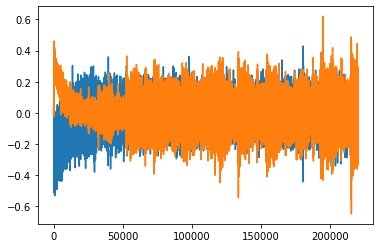

In [3]:
sr = 44100

print("Loading raw noise...")
raw_noise = sf.SoundFile("noise.RAW", samplerate=sr, channels=1, subtype='FLOAT')
print("Loaded raw!")
raw_noise_read = raw_noise.read(dtype=np.float64, always_2d=False)
noise_transpose = raw_noise_read.T

print("Loading raw music...")
music_raw = sf.SoundFile("music.RAW", samplerate=sr, channels=1, subtype='FLOAT')
print("Loaded raw!")
music_raw_read = music_raw.read(dtype=np.float64, always_2d=False)
music_transpose = music_raw_read.T

plt.plot(noise_transpose)
plt.plot(music_transpose)

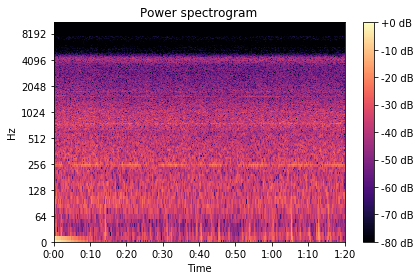

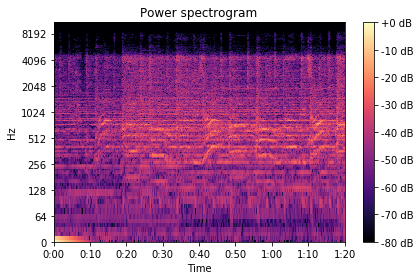

In [4]:
result_stft = librosa.stft(noise_transpose, win_length=2048, hop_length=64)

result_real = []
result_imag = []
for result in result_stft:
    result_real.append(result.real)
    result_imag.append(result.imag)
    
result_abs = np.abs(result_stft)

librosa.display.specshow(librosa.amplitude_to_db(result_abs, ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

result_stft = librosa.stft(music_transpose, win_length=2048, hop_length=64)

result_real = []
result_imag = []
for result in result_stft:
    result_real.append(result.real)
    result_imag.append(result.imag)
    
result_abs = np.abs(result_stft)

librosa.display.specshow(librosa.amplitude_to_db(result_abs, ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [5]:
c_fft_out = open("FFT_OUT")

result_real = []
result_imag = []
c_fft = []
for line in c_fft_out:
    vals = line.strip().split(",")
    
    if len(vals) == 2:
        result_real.append(float(vals[0]))
        result_imag.append(float(vals[1]))
        
        x = complex(float(vals[0]), float(vals[1]))
        c_fft.append(x)
        
fig3, ax3 = plt.subplots()
ax3.plot(result_real)

fig4, ax4 = plt.subplots()
ax4.plot(result_imag)

print(c_fft)

FileNotFoundError: [Errno 2] No such file or directory: 'FFT_OUT'

### LOOKING AT LMS PART

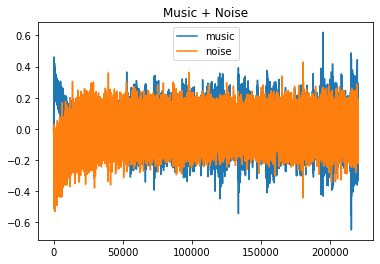

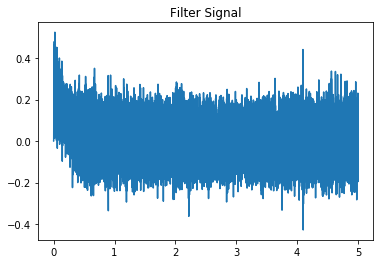

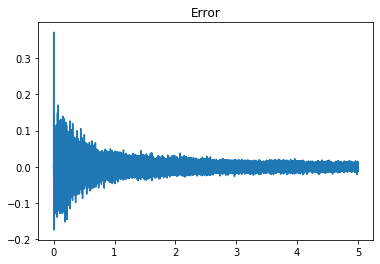

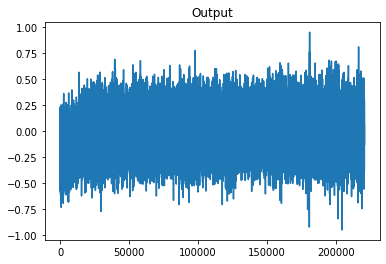

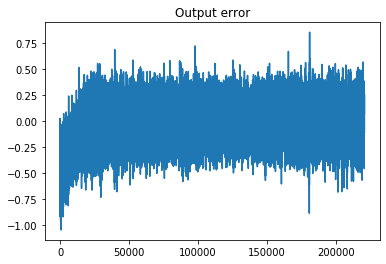

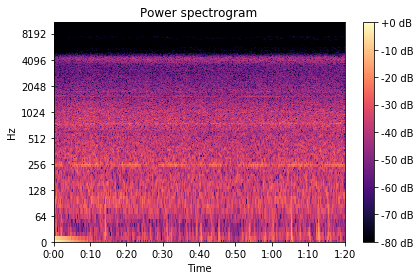

In [19]:
fYOut = open("Y_OUT")
fError = open("ERROR")
# fDesired = open("DESIRED")
# fNoise = open("NOISE")

# desired = []
# for line in fDesired:
#     val = re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)
#     if len(val) == 2:
#         desired.append((val[0], val[1]))

y_out = []
for line in fYOut:
    val = re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)
    if len(val) == 2:
        y_out.append((val[0], val[1]))
        
error = []
for line in fError:
    val = re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)
    if len(val) == 2:
        error.append((val[0], val[1]))
        
# noise = []
# for line in fNoise:
#     val = re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)
#     if len(val) == 2:
#         noise.append((val[0], val[1]))
        
y_out = np.array(y_out, 'float')
error = np.array(error, 'float')

fig1, ax1 = plt.subplots()
ax1.plot(music_transpose, label="music")
ax1.plot(noise_transpose, label="noise")
ax1.set_title("Music + Noise")
ax1.legend()      

fig2, ax2 = plt.subplots()
ax2.plot(y_out[:, 0], y_out[:, 1], label="y_out")
ax2.set_title("Filter Signal")

fig3, ax3 = plt.subplots()
ax3.plot(error[:, 0], error[:, 1], label="error")
ax3.set_title("Error")

added = music_transpose.T + noise_transpose.T - y_out[:, 1]
fig4, ax4 = plt.subplots()
ax4.plot(added, label="Output")
ax4.set_title("Output")

output_error = added - music_transpose.T
fig5, ax5 = plt.subplots()
ax5.plot(output_error, label="Output error")
ax5.set_title("Output error")

plt.show()

output_error_stft = librosa.stft(output_error, win_length=2048, hop_length=64)

librosa.display.specshow(librosa.amplitude_to_db(output_error_stft, ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()